# 4 - Training Models

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

This chapter covers the algorithms machine learning models use to train on data.

First is a linear regression model, one of the simplest models there is. There are two very different ways to train it.
- Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set (i.e. the model parameters that minimize the cost function over the training set).
- Using an iterative optimization approach, called Gradient Descent (GD) that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method. There are a few variants of Gradient Descent that will be uses again and again in neural networks: Batch GD, Mini-batch GD, and Stochastic GD.

Next is a Polynomial Regression, a more complex model that can fit non-linear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data; there are methods to detect whether or not this is the case, using learning curves. There are also several regularization techniques that can reduce the risk of overfitting the training set.

Lastly are Logistic Regression and Softmax Regression, methods commonly used for classification tasks.

> Most of these equations use linear algebra and calculus. To understand the equations requires knowledge of vectors and matrices, how to transpose them, multiply them, and inverse them, and what partial derivatives are.

## Linear Regression
A Linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (also called the *intercept term*). The equation is as follows:

$$\hat{y} = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\dots+\theta_{n}x_{n} $$
- $\hat{y}$ is the predicted value
- $n$ is the number of features
- $x_i$ is the $i^{th}$ feature value
- $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_{1},\theta_{2},\dots,\theta_{n}$

This can be written much more concisely using a vectorized form:

$$\hat{y} = h_\theta \textbf{(x)} = \theta \cdot \textbf{x}$$

- $\theta$ is the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
- $\textbf{x}$ is the instance's *feature vector*, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
- $\theta \cdot \textbf{x}$ is the dot product of the vector $\theta$ and $\textbf{x}$, which is of course equal to $\theta_{0}x_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\cdot+\theta_{n}x_n$
- $h_{\theta}$ is hypothesis function, using the model parameters $\theta$.

> In Machine Learning, vectors are often represented as *column vectors*, which are 2D arrays with a single column. If $\theta$ and $\textbf{x}$ are column vectors, then the prediction is: $\hat{y} = \theta^{\textbf{T}}_{\textbf{x}}$, where $\theta^{T}$ is the *transpose* of $\theta$ (a row vector instead of a column vector) and $\theta^{\textbf{T}}_{\textbf{x}}$ is the matrix multiplication of $\theta^{\textbf{T}}$ and $\textbf{x}$. If is of course the same prediction, except it is now represented as a single cell matrix rather than a scalar value. In this book we will use this notation to avoid switching between dot products and matrix multiplication.

When training this model, the parameters need to be set so that the model best fits the training set. First there needs to be a measure of how well (or poorly) the model fits the training data. The most common performance measure of a regression model is the Root Square Error (RMSE). Therefor, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

The MSE of a Linear Regression hypothesis $h_\theta$ on a training set $\textbf{X}$ is calculated using the equation below.

$$\text{MSE}(\textbf{X},h_{\theta})= \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}\mathbf{x}^{(i)}-y^{(i)})^2$$

Instead of an $h$ there is a $h_\theta$  in order to make it clear that the model is parameterized by the vector $\theta$. To simplify notation, MSE($\theta$) will be used.

### The Normal Equation
To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution* - in other words, a mathematical equation that gives the result directly. This is called the *Normal Equation*

$$\hat{\theta} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$
- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
- $\textbf{y}$ is the vector of target values containing $y^{(1)}$ to $y^{m}$.

Below is code that generates some linear-looking data to test this equation:

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


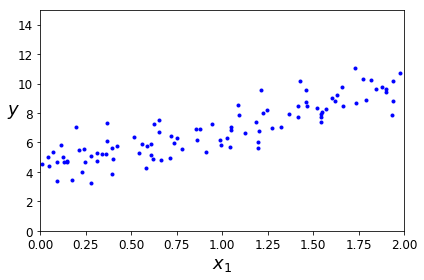

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

$\hat{\theta}$ can be computed using the Normal Equation. Use the `inv()` function from NumPy's Linear Algebra module `(np.linalg)` to compute the inverse of a matrix, and the `dot()` method for matrix multiplication:

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function used to generate the data $y=4+3x_1+ \text{Gaussian noise}$. Below is what the equation has found:

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

The best outcome is would have been if $\theta_0=4$ and $\theta_1=3$ instead of $\theta_0=3.865$ and $\theta_1=3.139$. This is close enough, but the noise made it impossible to recover the exat parameters of the original function.

Now predictions can be made using $\hat{\theta}$:

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict
#should be 4, 10

array([[4.21509616],
       [9.75532293]])

Below is a plot of the predictions:

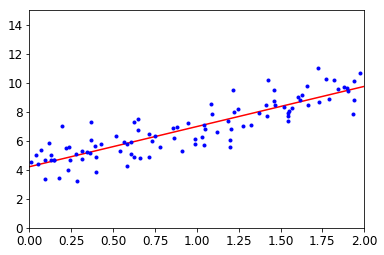

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Linear regressions ins Scikit-Learn are simple:

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (least squares), which can be called directly:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\hat{\theta} = \textbf{X}^{+}\textbf{y}$, where $\textbf{X}^+$ is the *pseudoinverse* of $\textbf{X}$ (specifically the Moore-Penrose inverse). This can be computed directly with `np.linalg.pinv()`:

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that can decompose the training set $\textbf{X}$ into the matrix multiplication of three matrices $\textbf{U}$ $\textbf{Σ}$ $\textbf{V}^t$ (see `numpy.linalg.svd())`. The pseudoinverse is computed as $\textbf{X}^{+}=\textbf{V}\textbf{Σ}^{+}\textbf{U}^t$. To compute the matrix $\textbf{Σ}^{+}$, the algorithm takes $\textbf{Σ}$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the noon-zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: the Normal Equation may not work if the matrix $\textbf{X}^T \textbf{X}$ is not invertible (i.e. singular), such as if $m<n$ or if some features are redundant, but the pseudoinverse is always defined.

### Computational Complexity
The Normal Equation computes the inverse of $\textbf{X}^T \textbf{X}$, which is an $(n+1) \times (n+1)$ matrix (where $n$ is the number of features). The *computational complexity* of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^{3})$ (depending on the implementation). In other words, if the number of features are doubled, the computation time is multiplied by roughly $2^{2.4}=5.3$ to $2^{3}=8$.

The SVD approach used by Scikit-Learn's `LinearRegression` class is about $O(n^{2})$. If you double the number of features, you multiply the computation time by roughly 4.

> Both the Normal Equation and the SVD approach get very slow when the number of features grows large (e.g. 100,000). On the positive side, both are linear with regards to the number of instances in the training set (they are $O(m)$), so they handle large training sets efficiently, provided they can fit in memory.

Once a Linear Regression model is trained (using the Normal Equation or any other algorithm), predictions are very fast: the computational complexity is linear with regards to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time.

There are other different ways to train Linear Regression models better suited for cases where there are a large number of features, or too many training instances to fit in memory.

## Gradient Descent
*Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Gradient Descent measures the local gradient of the  error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, the minimum has been reached.

Concretely, the process starts by filling $\theta$ with random values (this is called *random initilization$), and then improving it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm *converges* to a minimum. This process is illustrated below:

![title](GradientDescent.png)

An important parameter in Gradient Descent is the size of the steps, determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go thorugh many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, it might jump across the valley and end up on the other side, possibly even higher up than the previous iteration. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

![title](GradientStep.jpeg)

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult. The images below illustrates the two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, it will converge to a *local minimum*, which is not as good as the *global minimum*. If it starts on the right, then it will take a very long time to cross the plateau, and if it stops too early it will never reach the global minimum.

![title](GradientLocal.png)

The MSE cost function for a Linear Regression model happens to be a *convex function*, which means that for any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close to the global minimum (given enough time and if the learning rate is not too high)

The cost function has the shape of a bowl, bit it can be elongated bowl if the features have very different scales. The figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left) , and on a training set where feature 1 has much smaller values than feature 2 (on the right).

![title](GDFeatureScale.png)

On the left, the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

> When using Gradient Descent, ensure that all features have a similar scale (e.g. using Scikit-Learn's `StandardScaler` class), or else it will take  much longer to converge

The diagram aso illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model's *parameter space*: the more parameters a model has, the more dimensions that space has, and the harder the search is: searching for a needle in a 300-dimensional haystack is much trickier than in three dimensions. Fortunately, since the cost function is convex in the case of Linear Regression, the needle is simply at the bottom of the bowl.


## Batch Gradient Descent
To implement Gradient Descent, the gradient of the cost function needs to be computed with regards to each model parameter $\theta_j$. In other words, how much the cost function will change needs to be computed when $\theta_j$ is changed just a little bit. This is called a *partial derivative*.

Instead of computing the partial derivatives individually, it can be computed all in one go. The gradient vector, denoted by $\nabla_{\theta}\text{MSE}(\theta)$, contains all the partial derivatives of the cost function (one entry per parameter)

>Note that the formula to calculate the gradient vector involves calculation over the full training set $\textbf{X}, at each Gradient Descent step. This is why this algorithm is called *Batch Gradient Descent*

Once the gradient vector has been calculated with a positive gradient, move in the opposite direction to go downhill. This means subtracting $\nabla_{\theta}\text{MSE}(\theta)$ from $\theta$. This is where the learning rate $\eta$ comes into play: multiply the gradient vector by $\eta$ to determine the size of the downhill step. Below is the equation for the step:

$$\theta^{\text{(next step)}} = \theta - \eta\nabla_{\theta}\text{MSE}(\theta)  $$

Below is a quick implementation of the algorithm

In [12]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

This is exactly what the normal equation found. 
To get a prediction, dot product the label with $\theta$:

In [14]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

What if a different learning rate was used? The figure below shows the first 10 steps of Gradient Descent using three different learning rates (dashed line is starting point)

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


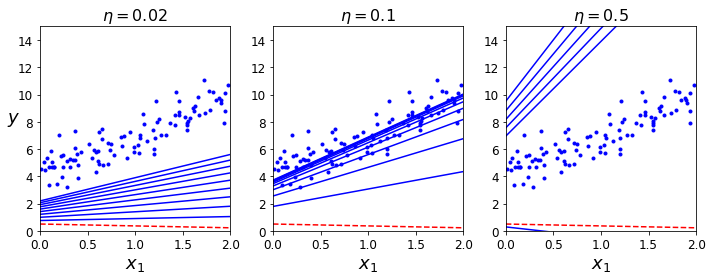

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

On the left, if the learning rate is too low: the algorithm will eventually reach the solution very slowly. In the middle, the learning rate seems very good as it converged to the solution in just a few iterations. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting farther away every step.

Grid search can be used to find a good learning rate. However, the number of iterations should be limited so that grid search can eliminated models that take too long to converge.

It is also important to set the number of iterations. If it is too low, the $\theta$ values may be to far away from the optimal solution when the algorithm stops, but if it is too high it will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny-that is, when its norm because smaller than a tiny number $\epsilon$ (called the *tolerance*)- because this happens when Gradient Descent has (almost) reached the minimum.

> **Convergence Rate**:
> When the cost function is convex and its slope does not change abruptly, Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but it may take a while: it can take O(1/ $\epsilon$) iterations to reach the optimum within a range of $\epsilon$ depending on the shape of the cost function. If tolerance is divided by 10 for a more precise solution, the algorithm may run about 10 times longer.

### Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, *Stochastic Gradient Descent* just picks a random instance in the training set at every step and computes the gradients based on that single instance. This makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm).

Due to its stochastic (random) nature, the algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average, Over time it will end up very close to the minimum, but once it get there it will continue to bounce around, never settling down (illustrated below). So once the algorithm stops, the final parameter values are good, but not optimal.

![title](StochasticGD.png)

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding teh global minimum than Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but because it means that the algorithm can never settle at the minimum. One solution is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to *simulated annealing*, an algorithm inspired from the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the *leaning schedule*. If the learning rate is reduced too quickly, it may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced to slowly, it may jump around the minimum for a long time and end up with a suboptimal solution if training is halted too early.

Below is code that implements Stochastic Gradient Descent using a simple learning schedule:

Saving figure sgd_plot


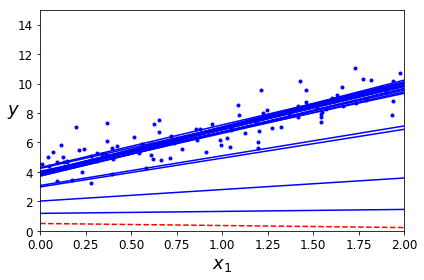

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                     
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
        theta_path_sgd.append(theta)                 # for plot

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
save_fig("sgd_plot")                                 
plt.show()          

In [20]:
theta

array([[4.21076011],
       [2.74856079]])

By convention, the algorithm iterates by rounds of $m$ iterations; each round is called an *epoch*. While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a fairly good solution.

The plot shows the first 20 steps of training (notice how irregular the steps are). Since the instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at all. To ensure that the algorithm goes through every instance at each epoch, another approach is to shuffle  the training set, then go through it instance by instance, then shuffle it again, and so on. However, this generally converges more slowly.

To preform a Linear Regression using SGD with Scikit-Learn,use the `SGDRegressor` class, which defaults to optimizing the squared error cost function. THe following code runs 50 epochs, starting wiht a learning rate of 0.1 (`eta0=0.1`), using the default learning schedule (different from the preceding one), and it does not use any regularization (`penaltry=None`)

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

### Mini-batch Gradient Descent
*Mini-batch Gradient Descent* is easy to understand after Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called *mini-batches*. The main advantage of Mini-batch GD over Stochastic is that it can get a preformance boost from hardware optimization of matrix operations, especially when using GPU's.

The algorithm's progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, it may be harder for it to escape form local minima. Below is an implementation of the algorithm:

In [23]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [24]:
theta

array([[4.25214635],
       [2.7896408 ]])

The parameter `minibatch_size` determines how many instances the gradient is computed on at each epoch.

The plot below shows the paths taken by the three Gradient Descent algorithms in parameter space during training. THey all end up near the minimum, but Batch GD's path actually stops at the minimum, while both Stochastic and Mini-batch GD continue to walk around. However, Batch GD takes a lot of time to take each step, and the other methods would reach the minimum faster given that it has a good learning schedule.

In [25]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


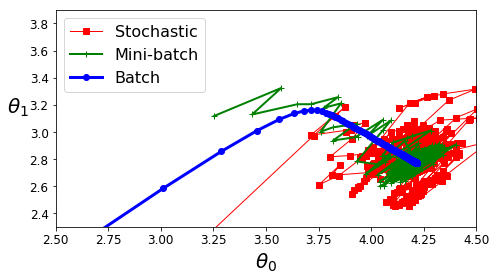

In [26]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

Below is a table analyzing the GD algorithms:

![title](linRegSklearn.PNG)

## Polynomial Regression
If data is more complex than a simple straight line, a linear model can still be used to fit the nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called *Polynomial Regression*.

First, generate some nonlinear data, based on a simple *quadratic equation*:

In [29]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # polynomial: 0.5X^2 + X + 2

Saving figure quadratic_data_plot


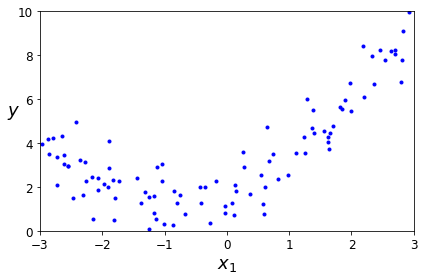

In [30]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

A straight line will never fit this data properly. Scikit-Learn's `PolynomialFeatures` class can transform the training data, adding the $2^{nd}$ degree polynomial of each feature in the training set as new features (in this case just 1 feature):

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [34]:
X_poly[0]

array([-0.75275929,  0.56664654])

`X_poly` now contains the original feature of `X` plus the square of this feature. Now a `LinearRegression` model can fit to this extended training data:

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


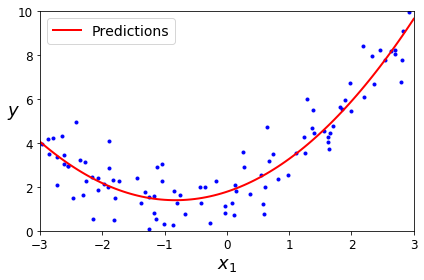

In [37]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

The model estimates $\hat{y}= 0.56x^2_1 + 0.93x_1 + 1.78$ when the original function was $y= 0.5x^2_1 + 1.0x_1 + 2.0 + \text{Gaussian noise}$.

Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that `PolynomialFeatures` also adds all combinations of features up to the given degree. For example, if there were two features $a$ and $b$, `PolynomialFeatures` with `degree=3` would not only add the features $a^2,a^3,b^2,\text{ and } b^3$, but also the combinations $ab,a^2b,\text{ and } ab^2$.

> `PolynomialFeatures(degree=d)` transforms an array containing $n$ features into an array containing $\frac{(n+d)!}{d!n!}$ features. Beware of the combinatorial explosion of the number of features.

## Learning Curves
Performing a high-degree Polynomial Regression will likely fit the training data much better than a plain Linear Regression. The diagram below applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model ($2^{nd}$-degree polynomial) Notice how the 300-degree polynomial wiggles around to get as close as possible to the training instances:

Saving figure high_degree_polynomials_plot


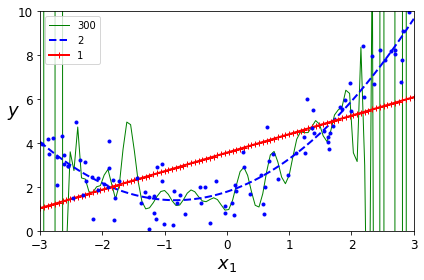

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

The high-degree Polynomial Regression is severely overfitting the training data while the linear model is underfitting it. The model that will generalize bes in this case is the quadratic model. It makes sense since the data was generated using a quadratic model, but in general this won't be known. so how should the complexity of te model be decided and what shows whether it is overfitting of underfitting the data.

One method is to verify the models performance with cross-validation. Another way is to use *learning curves*: these are plots of the model's performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data:

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

Saving figure underfitting_learning_curves_plot


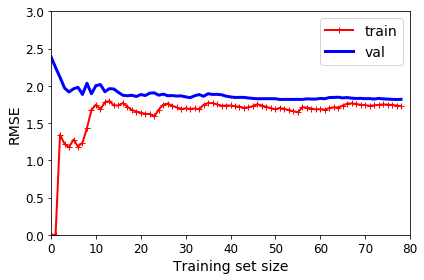

In [43]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
save_fig("underfitting_learning_curves_plot")   
plt.show() 

Above is the learning curve for the Linear Regression model. Looking at the performance on the training data, when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances doesn't make the average error much better or worse. Looking at the performance on the validation data,  when the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. THen as the model is show more training examples, it earns and thus the validation error slowly goes down, However once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau very close to the other curve.

These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high.

> If the model is underfitting the training data, adding more training examples will not help. A more complex model and/or a set of better features is needed.

Below is a learning curve for a $10^{th}$ degree polynomial:

Saving figure learning_curves_plot


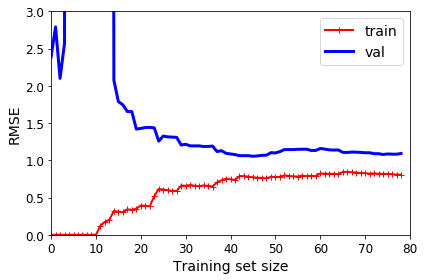

In [49]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot")  
plt.show()                        

The learning curves look like the previous ones, but there are two very important differences:
- The error on the training data is much lower than with Linear Regression model.
- There is a gap between the curves, This means that the model performs significantly better on the training data than on the validation data. which is the hallmark of an overfitting model. However, using a much larger training set would not continue making the two curves closer.

> One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.